# Food Delivery Data Analysis


In [11]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Ingestion: Transaction Records

In [12]:
df_trans = pd.read_csv('orders.csv')
print(f"Orders Dataset Shape: {df_trans.shape}")
print(f"\nColumns: {df_trans.columns.tolist()}")
print(f"\nFirst 5 rows:")
df_trans.head()

Orders Dataset Shape: (10000, 6)

Columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name']

First 5 rows:


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,93,2874,1,22-01-2023,441.18,Royal Kitchen Family Restaurant
1,1939,287,1,25-06-2023,686.75,Royal Kitchen Family Restaurant
2,2253,1521,1,15-09-2023,1311.97,Royal Kitchen Family Restaurant
3,2546,2018,1,20-08-2023,128.37,Royal Kitchen Family Restaurant
4,3474,2263,1,10-02-2023,257.67,Royal Kitchen Family Restaurant


## 2. Data Ingestion: Customer Profiles

In [13]:
with open('users.json', 'r') as file_in:
    raw_json = json.load(file_in)

df_cust = pd.DataFrame(raw_json)
print(f"Users Dataset Shape: {df_cust.shape}")
print(f"\nColumns: {df_cust.columns.tolist()}")
print(f"\nFirst 5 rows:")
df_cust.head()

Users Dataset Shape: (3000, 4)

Columns: ['user_id', 'name', 'city', 'membership']

First 5 rows:


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


## 3. Data Ingestion: Restaurant Metadata

In [14]:
with open('restaurants.sql', 'r') as sql_file:
    raw_sql = sql_file.read()

parsed_rest = []
sql_regex = r"INSERT INTO restaurants VALUES \((?P<id>\d+), '(?P<name>[^']+)', '(?P<cuisine>[^']+)', (?P<rating>[\d.]+)\);"
extracted = re.findall(sql_regex, raw_sql)

for item in extracted:
    parsed_rest.append({
        'restaurant_id': int(item[0]),
        'restaurant_name': item[1],
        'cuisine': item[2],
        'rating': float(item[3])
    })

df_rest = pd.DataFrame(parsed_rest)
print(f"Restaurants Dataset Shape: {df_rest.shape}")
print(f"\nColumns: {df_rest.columns.tolist()}")
print(f"\nFirst 5 rows:")
df_rest.head()

Restaurants Dataset Shape: (500, 4)

Columns: ['restaurant_id', 'restaurant_name', 'cuisine', 'rating']

First 5 rows:


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


## 4. Dataset Integration

In [15]:
df_temp = df_trans.merge(df_cust, on='user_id', how='left')
print(f"After merging with users: {df_temp.shape}")

df_main = df_temp.merge(df_rest, on='restaurant_id', how='left')
print(f"After merging with restaurants: {df_main.shape}")

print(f"\nFinal Dataset Columns: {df_main.columns.tolist()}")
print(f"\nFinal Dataset Preview:")
df_main.head()

After merging with users: (10000, 9)
After merging with restaurants: (10000, 12)

Final Dataset Columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']

Final Dataset Preview:


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,93,2874,1,22-01-2023,441.18,Royal Kitchen Family Restaurant,User_2874,Hyderabad,Regular,Restaurant_1,Chinese,4.8
1,1939,287,1,25-06-2023,686.75,Royal Kitchen Family Restaurant,User_287,Bangalore,Regular,Restaurant_1,Chinese,4.8
2,2253,1521,1,15-09-2023,1311.97,Royal Kitchen Family Restaurant,User_1521,Hyderabad,Regular,Restaurant_1,Chinese,4.8
3,2546,2018,1,20-08-2023,128.37,Royal Kitchen Family Restaurant,User_2018,Bangalore,Gold,Restaurant_1,Chinese,4.8
4,3474,2263,1,10-02-2023,257.67,Royal Kitchen Family Restaurant,User_2263,Hyderabad,Gold,Restaurant_1,Chinese,4.8


## 5. Feature Engineering

In [16]:
df_main['order_date'] = pd.to_datetime(df_main['order_date'], format='%d-%m-%Y')
df_main['year'] = df_main['order_date'].dt.year
df_main['month'] = df_main['order_date'].dt.month
df_main['quarter'] = df_main['order_date'].dt.quarter
df_main['day_of_week'] = df_main['order_date'].dt.day_name()

def categorize_rating(val):
    if pd.isna(val):
        return None
    elif 3.0 <= val <= 3.5:
        return "3.0 – 3.5"
    elif 3.6 <= val <= 4.0:
        return "3.6 – 4.0"
    elif 4.1 <= val <= 4.5:
        return "4.1 – 4.5"
    elif 4.6 <= val <= 5.0:
        return "4.6 – 5.0"
    return None

df_main['rating_range'] = df_main['rating'].apply(categorize_rating)

print("Data preprocessing completed!")
print(f"\nDataset Info:")
df_main.info()

Data preprocessing completed!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           10000 non-null  int64         
 1   user_id            10000 non-null  int64         
 2   restaurant_id      10000 non-null  int64         
 3   order_date         10000 non-null  datetime64[ns]
 4   total_amount       10000 non-null  float64       
 5   restaurant_name_x  10000 non-null  object        
 6   name               10000 non-null  object        
 7   city               10000 non-null  object        
 8   membership         10000 non-null  object        
 9   restaurant_name_y  10000 non-null  object        
 10  cuisine            10000 non-null  object        
 11  rating             10000 non-null  float64       
 12  year               10000 non-null  int32         
 13  month            

## 6. Export Processed Data

In [17]:
df_main.to_csv('final_food_delivery_dataset.csv', index=False)
print(f"Final dataset saved with {len(df_main)} rows!")

Final dataset saved with 10000 rows!


---
# Analytical Insights (Q&A)

**Q1: City-wise revenue contribution from Gold tier members.**

In [18]:
q1_res = df_main[df_main['membership'] == 'Gold'].groupby('city')['total_amount'].sum().sort_values(ascending=False)
print("Gold Member Revenue by City:")
print(q1_res)

Gold Member Revenue by City:
city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64


**Q2: Highest average order value by cuisine type.**

In [19]:
q2_res = df_main.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)
print("Average Order Value by Cuisine:")
print(q2_res)

Average Order Value by Cuisine:
cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64


**Q3: Count of unique high-value users (Total spend > ₹1000).**

In [20]:
user_totals = df_main.groupby('user_id')['total_amount'].sum()
q3_res = (user_totals > 1000).sum()
print(f"Number of users with total orders > ₹1000: {q3_res}")

Number of users with total orders > ₹1000: 2544


**Q4: Revenue distribution based on restaurant rating buckets.**

In [21]:
q4_res = df_main.groupby('rating_range')['total_amount'].sum().sort_values(ascending=False)
print("Revenue by Rating Range:")
print(q4_res)

Revenue by Rating Range:
rating_range
4.6 – 5.0    2197030.75
3.0 – 3.5    2136772.70
4.1 – 4.5    1960326.26
3.6 – 4.0    1717494.41
Name: total_amount, dtype: float64


**Q5: City with highest AOV for Gold Members.**

In [22]:
q5_res = df_main[df_main['membership'] == 'Gold'].groupby('city')['total_amount'].mean().sort_values(ascending=False)
print("Gold Member Average Order Value by City:")
print(q5_res)

Gold Member Average Order Value by City:
city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64


**Q6: Cuisine with fewest restaurants but significant revenue.**

In [23]:
q6_res = df_main.groupby('cuisine').agg({
    'restaurant_id': 'nunique',
    'total_amount': 'sum'
}).rename(columns={'restaurant_id': 'num_restaurants', 'total_amount': 'total_revenue'}).sort_values('num_restaurants')
print("Cuisine Statistics:")
print(q6_res)

Cuisine Statistics:
         num_restaurants  total_revenue
cuisine                                
Chinese              120     1930504.65
Indian               126     1971412.58
Italian              126     2024203.80
Mexican              128     2085503.09


**Q7: Gold membership order share percentage.**

In [24]:
cnt_gold = (df_main['membership'] == 'Gold').sum()
cnt_total = len(df_main)
pct_gold = (cnt_gold / cnt_total) * 100

print(f"Gold orders: {cnt_gold}")
print(f"Total orders: {cnt_total}")
print(f"Percentage: {pct_gold:.2f}%")

Gold orders: 4987
Total orders: 10000
Percentage: 49.87%


**Q8: High-value niche restaurants (High AOV, <20 orders).**

In [25]:
rest_metrics = df_main.groupby('restaurant_name_x').agg({
    'total_amount': ['mean', 'count']
}).reset_index()
rest_metrics.columns = ['restaurant_name', 'avg_order_value', 'order_count']
niche_rests = rest_metrics[rest_metrics['order_count'] < 20].sort_values('avg_order_value', ascending=False)

print("Top restaurants with < 20 orders:")
print(niche_rests.head(10))

target_list = ['Grand Cafe Punjabi', 'Grand Restaurant South Indian', 'Ruchi Mess Multicuisine', 'Ruchi Foods Chinese']
target_check = rest_metrics[(rest_metrics['restaurant_name'].isin(target_list)) &
                            (rest_metrics['order_count'] < 20)].sort_values('avg_order_value', ascending=False)
print("\nFrom given options with < 20 orders:")
print(target_check)

Top restaurants with < 20 orders:
                           restaurant_name  avg_order_value  order_count
173               Hotel Dhaba Multicuisine      1040.222308           13
354                       Sri Mess Punjabi      1029.180833           12
236                  Ruchi Biryani Punjabi      1002.140625           16
343                  Sri Delights Pure Veg       989.467222           18
88       Classic Kitchen Family Restaurant       973.167895           19
172                    Hotel Dhaba Chinese       973.125556           18
28                      Amma Mess Pure Veg       965.299444           18
161                 Hotel Biryani Pure Veg       964.577692           13
41      Annapurna Curry House Multicuisine       954.512353           17
405  Taste of Restaurant Family Restaurant       948.220000           10

From given options with < 20 orders:
         restaurant_name  avg_order_value  order_count
254  Ruchi Foods Chinese       686.603158           19


**Q9: Highest revenue generating segment (Membership + Cuisine).**

In [26]:
q9_res = df_main.groupby(['membership', 'cuisine'])['total_amount'].sum().sort_values(ascending=False)
print("Revenue by Membership + Cuisine Combination:")
print(q9_res)

Revenue by Membership + Cuisine Combination:
membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64


**Q10: Best performing quarter.**

In [27]:
q10_res = df_main.groupby('quarter')['total_amount'].sum().sort_values(ascending=False)
print("Revenue by Quarter:")
print(q10_res)

Revenue by Quarter:
quarter
3    2037385.10
4    2018263.66
1    2010626.64
2    1945348.72
Name: total_amount, dtype: float64


**Q11: Total Gold orders count.**

In [28]:
q11_ans = len(df_main[df_main['membership'] == 'Gold'])
print(f" {q11_ans}")

 4987


**Q12: Revenue specific to Hyderabad.**

In [29]:
hyd_rev = df_main[df_main['city'] == 'Hyderabad']['total_amount'].sum()
print(f"Total revenue: ₹{hyd_rev:.2f}")

Total revenue: ₹1889366.58


**Q13: Unique active user count.**

In [30]:
q13_ans = df_main['user_id'].nunique()
print(f" {q13_ans}")

 2883


**Q14: Gold member AOV.**

In [31]:
gold_aov = df_main[df_main['membership'] == 'Gold']['total_amount'].mean()
print(f" {gold_aov:.2f}")

 797.15


**Q15: Volume of orders for top-rated restaurants (>= 4.5).**

In [32]:
q15_ans = len(df_main[df_main['rating'] >= 4.5])
print(f" {q15_ans}")

 3374


**Q16: Orders from Gold members in their top revenue city.**

In [33]:
gold_city_rev = df_main[df_main['membership'] == 'Gold'].groupby('city')['total_amount'].sum().sort_values(ascending=False)
best_gold_city = gold_city_rev.idxmax()
print(f"Top revenue city for Gold members: {best_gold_city}")

q16_ans = len(df_main[(df_main['membership'] == 'Gold') & (df_main['city'] == best_gold_city)])
print(f" {q16_ans}")

Top revenue city for Gold members: Chennai
 1337


---
# Visual Analytics

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = pd.read_csv("final_food_delivery_dataset.csv")
df_viz["order_date"] = pd.to_datetime(df_viz["order_date"])

print("=" * 70)
print("FOOD DELIVERY PLATFORM – DATA INSIGHTS")
print("=" * 70)
print(f"Total orders placed: {len(df_viz)}")
print(f"Overall revenue generated: ₹{df_viz['total_amount'].sum():,.2f}")

FOOD DELIVERY PLATFORM – DATA INSIGHTS
Total orders placed: 10000
Overall revenue generated: ₹8,011,624.12


In [35]:
print("\n1. ORDER FLOW OVER TIME")
df_viz["month"] = df_viz["order_date"].dt.month
monthly_agg = df_viz.groupby("month")["total_amount"].agg(["count", "sum"])
print("\nMonthly breakdown:")
print(monthly_agg)

df_viz["quarter"] = df_viz["order_date"].dt.quarter
quarter_agg = df_viz.groupby("quarter")["total_amount"].agg(["count", "sum"])
print("\nQuarter-wise performance:")
print(quarter_agg)


1. ORDER FLOW OVER TIME

Monthly breakdown:
       count        sum
month                  
1        831  663020.26
2        785  630867.40
3        903  716738.98
4        812  666097.18
5        844  668428.61
6        784  610822.93
7        859  688559.45
8        851  694987.58
9        812  653838.07
10       863  699187.73
11       807  637772.43
12       849  681303.50

Quarter-wise performance:
         count         sum
quarter                   
1         2519  2010626.64
2         2440  1945348.72
3         2522  2037385.10
4         2519  2018263.66


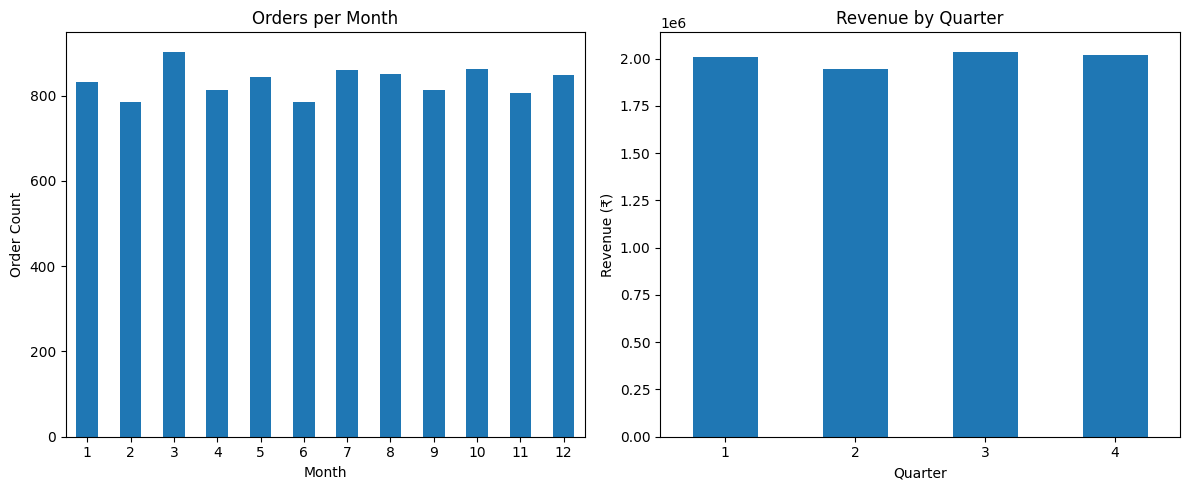

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
monthly_agg["count"].plot(kind="bar")
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
quarter_agg["sum"].plot(kind="bar")
plt.title("Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


2. USER ORDERING BEHAVIOR

Avg orders per user: 3.47
One-time users: 344
Frequent users (5+ orders): 714

Avg spend per user: ₹2778.92
Median spend per user: ₹2514.92


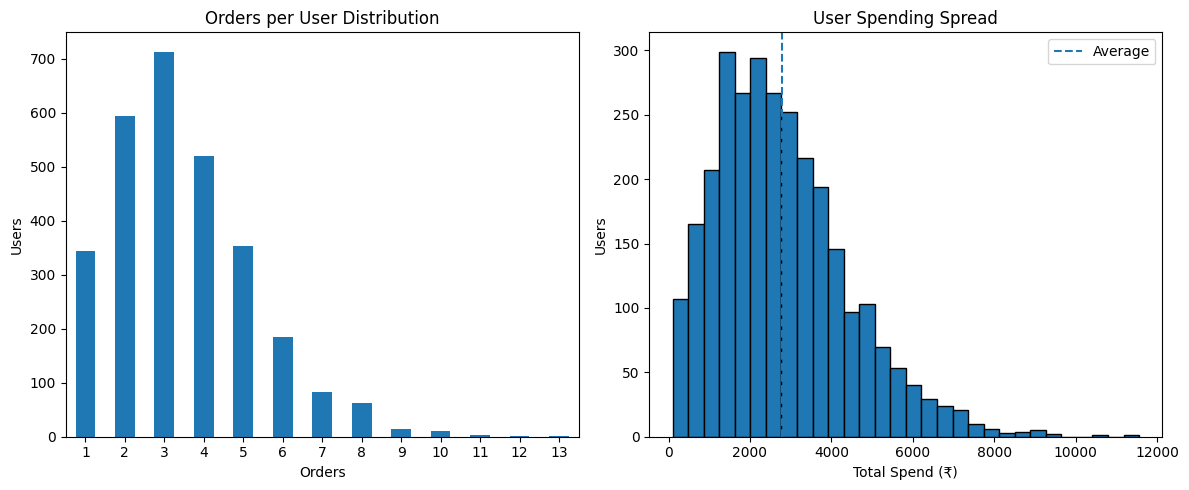

In [37]:
print("\n2. USER ORDERING BEHAVIOR")

usr_freq = df_viz.groupby("user_id").size()
print(f"\nAvg orders per user: {usr_freq.mean():.2f}")
print(f"One-time users: {(usr_freq == 1).sum()}")
print(f"Frequent users (5+ orders): {(usr_freq >= 5).sum()}")

usr_val = df_viz.groupby("user_id")["total_amount"].sum()
print(f"\nAvg spend per user: ₹{usr_val.mean():.2f}")
print(f"Median spend per user: ₹{usr_val.median():.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
usr_freq.value_counts().sort_index().plot(kind="bar")
plt.title("Orders per User Distribution")
plt.xlabel("Orders")
plt.ylabel("Users")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.hist(usr_val, bins=30, edgecolor="black")
plt.title("User Spending Spread")
plt.xlabel("Total Spend (₹)")
plt.ylabel("Users")
plt.axvline(usr_val.mean(), linestyle="--", label="Average")
plt.legend()

plt.tight_layout()
plt.show()


3. CITY AND CUISINE PERFORMANCE

City-level stats:
           count         sum        mean
city                                    
Bangalore   2751  2206946.58  802.234308
Chennai     2469  1990513.03  806.202118
Hyderabad   2350  1889366.58  803.985779
Pune        2430  1924797.93  792.097914

Cuisine-wise stats:
         count         sum        mean
cuisine                               
Chinese   2418  1930504.65  798.389020
Indian    2469  1971412.58  798.466011
Italian   2532  2024203.80  799.448578
Mexican   2581  2085503.09  808.021344


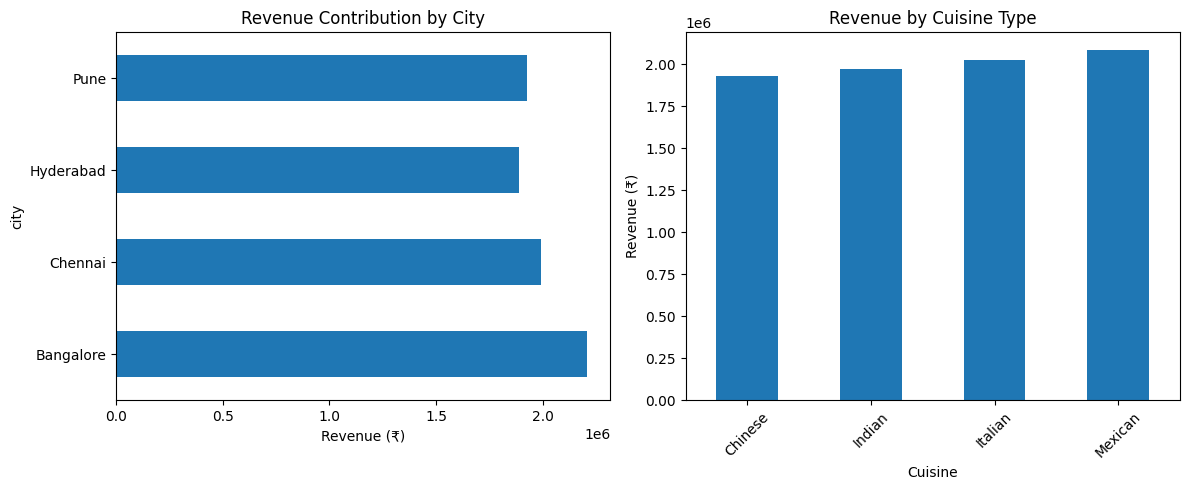

In [38]:
print("\n3. CITY AND CUISINE PERFORMANCE")

stat_city = df_viz.groupby("city")["total_amount"].agg(["count", "sum", "mean"])
print("\nCity-level stats:")
print(stat_city)

stat_cuisine = df_viz.groupby("cuisine")["total_amount"].agg(["count", "sum", "mean"])
print("\nCuisine-wise stats:")
print(stat_cuisine)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stat_city["sum"].plot(kind="barh")
plt.title("Revenue Contribution by City")
plt.xlabel("Revenue (₹)")

plt.subplot(1, 2, 2)
stat_cuisine["sum"].plot(kind="bar")
plt.title("Revenue by Cuisine Type")
plt.xlabel("Cuisine")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


4. MEMBERSHIP EFFECT

Membership comparison:
            count         sum        mean
membership                               
Gold         4987  3975364.89  797.145556
Regular      5013  4036259.23  805.158434

City vs Membership distribution:
membership  Gold  Regular
city                     
Bangalore   1254     1497
Chennai     1337     1132
Hyderabad   1112     1238
Pune        1284     1146


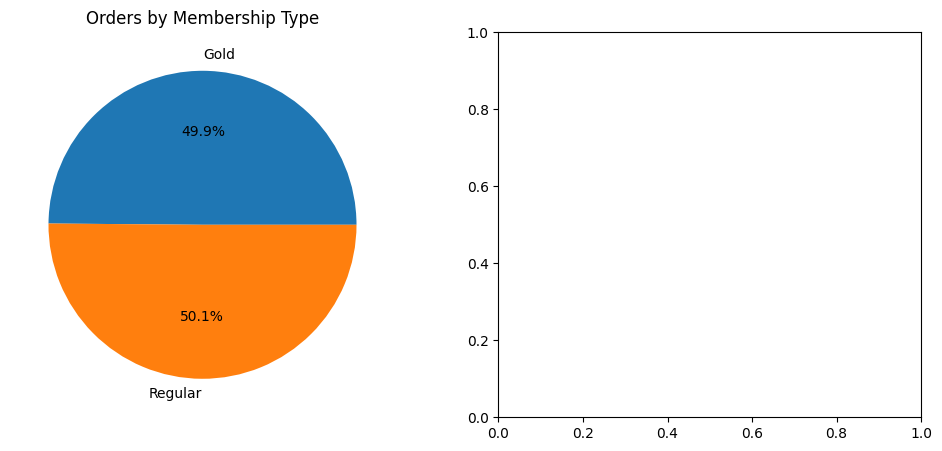

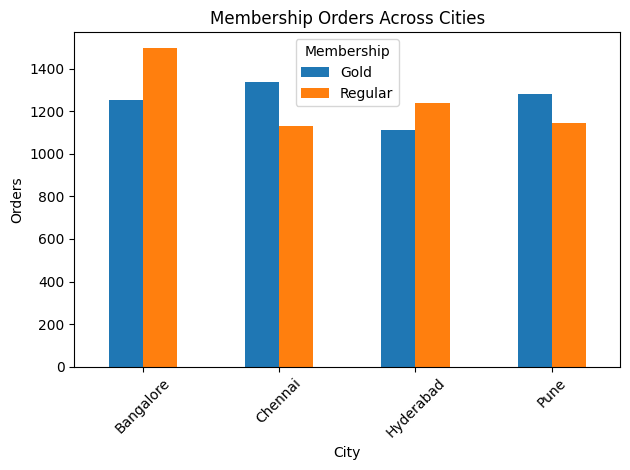

In [39]:
print("\n4. MEMBERSHIP EFFECT")

stat_member = df_viz.groupby("membership")["total_amount"].agg(["count", "sum", "mean"])
print("\nMembership comparison:")
print(stat_member)

cross_city_mem = pd.crosstab(df_viz["city"], df_viz["membership"])
print("\nCity vs Membership distribution:")
print(cross_city_mem)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stat_member["count"].plot(kind="pie", autopct="%1.1f%%")
plt.title("Orders by Membership Type")
plt.ylabel("")

plt.subplot(1, 2, 2)
cross_city_mem.plot(kind="bar")
plt.title("Membership Orders Across Cities")
plt.xlabel("City")
plt.ylabel("Orders")
plt.xticks(rotation=45)
plt.legend(title="Membership")

plt.tight_layout()
plt.show()


5. REVENUE PATTERNS & SEASONALITY

Total revenue: ₹8,011,624.12
Average order value: ₹801.16
Median order value: ₹806.30
Lowest order value: ₹100.20
Highest order value: ₹1499.83

Quarterly revenue totals:
quarter
1    2010626.64
2    1945348.72
3    2037385.10
4    2018263.66
Name: sum, dtype: float64


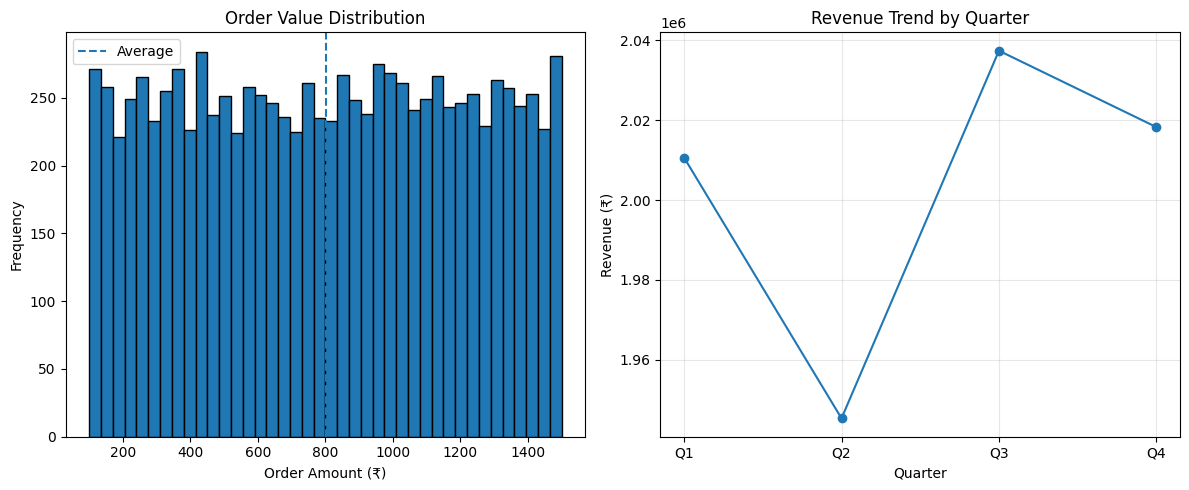

In [40]:
print("\n5. REVENUE PATTERNS & SEASONALITY")

print(f"\nTotal revenue: ₹{df_viz['total_amount'].sum():,.2f}")
print(f"Average order value: ₹{df_viz['total_amount'].mean():.2f}")
print(f"Median order value: ₹{df_viz['total_amount'].median():.2f}")
print(f"Lowest order value: ₹{df_viz['total_amount'].min():.2f}")
print(f"Highest order value: ₹{df_viz['total_amount'].max():.2f}")

print("\nQuarterly revenue totals:")
print(quarter_agg["sum"])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_viz["total_amount"], bins=40, edgecolor="black")
plt.title("Order Value Distribution")
plt.xlabel("Order Amount (₹)")
plt.ylabel("Frequency")
plt.axvline(df_viz["total_amount"].mean(), linestyle="--", label="Average")
plt.legend()

plt.subplot(1, 2, 2)
quarter_agg["sum"].plot(marker="o")
plt.title("Revenue Trend by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Revenue (₹)")
plt.xticks([1, 2, 3, 4], ["Q1", "Q2", "Q3", "Q4"])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()